# 11. Neural Networks with MNIST

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as dsets #torch설치할 때 자동깔림
import torchvision.transforms as transforms

import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 11.1 Prepare MNIST Data

In [3]:
train_data = dsets.MNIST(root='data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

test_data = dsets.MNIST(root='data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

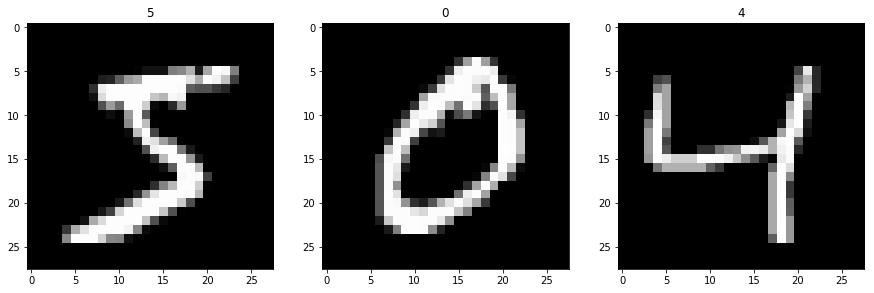

In [4]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(train_data.targets[0].item())
ax1.imshow(train_data.data[0,:,:].numpy(), cmap='gray')

ax2.set_title(train_data.targets[1].item())
ax2.imshow(train_data.data[1,:,:].numpy(), cmap='gray')

ax3.set_title(train_data.targets[2].item())
ax3.imshow(train_data.data[2,:,:].numpy(), cmap='gray')

## 11.2 Make Batch Loader

In [5]:
batch_size = 100
    
train_loader  = DataLoader(dataset=train_data,
                           batch_size=batch_size,
                           shuffle=True)

In [6]:
batch_images, batch_labels = iter(train_loader).next()
print(batch_labels.numpy(), ", ", len(batch_labels.numpy()))

[1 4 7 1 4 8 1 5 0 9 6 7 7 3 9 3 1 0 0 4 9 7 7 9 1 8 4 1 5 5 4 0 6 1 3 2 2
 6 8 5 1 6 8 0 3 6 8 7 8 1 6 6 6 1 5 2 0 5 8 9 0 4 7 7 0 7 0 3 0 2 5 3 3 5
 0 8 7 3 9 5 3 0 4 1 1 6 8 5 7 5 7 9 7 8 1 3 8 0 1 6] ,  100


## 11.3 Define Model

In [7]:
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

In [8]:
loss = nn.CrossEntropyLoss()
# def cross_entropy(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True):

# Args:
#     input: Variable :math:`(N, C)` where `C = number of classes`
#     target: Variable :math:`(N)` where each value is
#         `0 <= targets[i] <= C-1`
#     weight (Tensor, optional): a manual rescaling weight given to each

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 11.4 Train Model

In [9]:
num_epochs = 5

In [10]:
for epoch in range(num_epochs):
    
    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.view(-1, 28 * 28)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/5], lter [300/600], Loss: 2.2556
Epoch [1/5], lter [600/600], Loss: 2.1938
Epoch [2/5], lter [300/600], Loss: 2.1077
Epoch [2/5], lter [600/600], Loss: 2.0286
Epoch [3/5], lter [300/600], Loss: 1.9647
Epoch [3/5], lter [600/600], Loss: 1.8388
Epoch [4/5], lter [300/600], Loss: 1.8296
Epoch [4/5], lter [600/600], Loss: 1.6084
Epoch [5/5], lter [300/600], Loss: 1.5954
Epoch [5/5], lter [600/600], Loss: 1.4325
Learning Finished!


## 11.5 Test Model

In [11]:
correct = 0
total = 0

for images, labels in test_data:
    
    images  = images.view(-1, 28 * 28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 78.370000 %


In [12]:
r = random.randint(0, len(test_data)-1)
X_single_data = test_data.data[r:r + 1].view(-1,28*28).float()
Y_single_data = test_data.targets[r:r + 1]

Label :  [9]
Prediction :  [9]


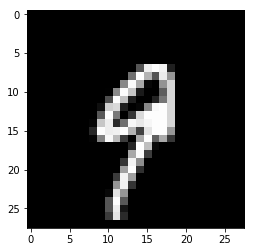

In [13]:
single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())

## 11.6 Black Box

Prediction :  [0]


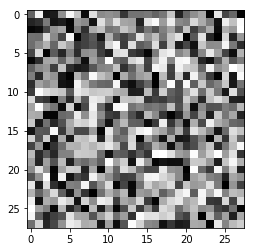

In [14]:
blackbox = torch.rand(X_single_data.size())
blackbox_pre = model(blackbox)

plt.imshow(blackbox.data.view(28,28).numpy(), cmap='gray')

print('Prediction : ', torch.max(blackbox_pre.data, 1)[1].numpy())

### github 추가

In [7]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [5]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True)

In [6]:
# Initialization
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[ 1.4129,  0.3747,  0.5719,  ..., -0.2531, -0.9091,  0.0367],
        [-1.1262,  1.7531,  0.7598,  ..., -0.9579,  0.5337, -0.1712],
        [ 0.8586, -0.4215,  0.1808,  ..., -1.6348, -0.6129,  0.0577],
        ...,
        [-0.5895,  0.4366, -0.0238,  ..., -0.9362, -0.5459,  0.1294],
        [ 0.3510,  1.0604,  0.2801,  ..., -0.2697,  0.2021, -0.0480],
        [ 0.1258,  0.9395, -0.5132,  ...,  0.0709,  0.9774, -1.0350]],
       requires_grad=True)

#### use optimizer Adam

In [8]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()   # Softmax is internally computed.
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate)

In [9]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [12]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        Y = Y

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 5.448657513
Epoch: 0002 cost = 1.611010909
Epoch: 0003 cost = 1.054542542
Epoch: 0004 cost = 0.842877984
Epoch: 0005 cost = 0.726138234
Epoch: 0006 cost = 0.648570359
Epoch: 0007 cost = 0.592080295
Epoch: 0008 cost = 0.549018919
Epoch: 0009 cost = 0.515573561
Epoch: 0010 cost = 0.488139004
Epoch: 0011 cost = 0.465857387
Epoch: 0012 cost = 0.447226733
Epoch: 0013 cost = 0.430577099
Epoch: 0014 cost = 0.417006850
Epoch: 0015 cost = 0.404397666
Learning finished


In [22]:
# Test the model using test sets
with torch.no_grad():
    X_test = test_data.test_data.view(-1, 28 * 28).float()
    Y_test = test_data.test_labels

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(test_data) -1)
    X_single_data = test_data.test_data[r:r + 1].view(-1, 28 * 28).float()
    Y_single_data = test_data.test_labels[r:r + 1]

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.883899986743927
Label:  7
Prediction:  7


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
